In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
df=pd.read_csv('data/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [18]:
# df.describe()
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [19]:
data = pd.DataFrame(df[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')

In [20]:
data.head()

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


<AxesSubplot:xlabel='Date'>

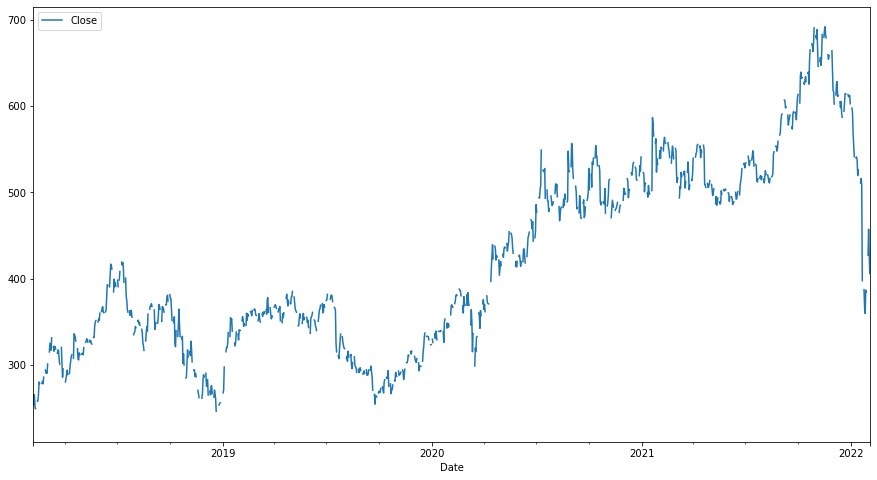

In [21]:
data.plot(figsize=(15,8))

In [22]:
# days = df['Date'] - df['Date'][0]
# days

0         0 days
1         1 days
2         2 days
3         3 days
4         4 days
          ...   
1004   1456 days
1005   1457 days
1006   1458 days
1007   1459 days
1008   1460 days
Name: Date, Length: 1009, dtype: timedelta64[ns]

In [45]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values
date = df['Date']
# x = df[['Date']].values
# y = df['Close'].values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(x_train, y_train)

LinearRegression()

In [35]:
print(regressor.coef_)

[ 8.22540803e-01  8.06769922e-01 -6.29437341e-01  3.64187592e-08]


In [36]:
print(regressor.intercept_)

-0.01921697611237505


In [37]:
predicted = regressor.predict(x_test)

In [38]:
print(predicted)

[585.61410514 634.66483717 366.23294004 431.90706619 415.38934046
 343.83608796 500.83250921 531.65615338 347.73560515 333.45049424
 481.62627318 364.24398933 656.71374556 349.55011463 357.64776388
 325.09459016 396.14132607 258.78719331 266.62324451 541.89980888
 598.23896295 340.55325857 271.32159592 319.44650289 295.71874583
 363.16725663 417.95947688 541.41497181 502.34309399 501.92008136
 605.50242908 525.03918568 531.79032138 372.68308839 356.28441958
 273.46624657 351.70944911 537.90747151 357.54994981 668.38086084
 423.19778857 364.19335958 392.76142043 394.24692766 414.75474426
 503.47504251 447.39124931 295.16582967 378.41856934 551.85901733
 283.9919743  313.39944554 330.64363044 302.64215211 350.49610783
 298.17370444 515.18957786 484.99524675 610.33906494 488.54399
 379.83787371 487.11588113 306.94528568 501.37748904 473.31311344
 524.10183381 679.82964235 492.6089632  534.43689106 287.98822253
 284.04500799 341.99954937 338.1741829  453.88690019 325.93680335
 330.50089038

In [39]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [40]:
df2.head()

,Actual,Predicted
0,591.150024,585.614105
1,634.809998,634.664837
2,365.489990,366.232940
3,433.829987,431.907066
4,419.730011,415.389340


In [ ]:
# import math
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
# print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

In [41]:
graph = df2.head(20)

<AxesSubplot:>

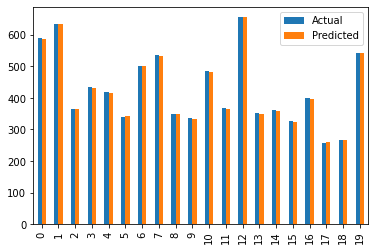

In [42]:
graph.plot(kind='bar')